## Spaceship titanic

### Analiza Zadania
Zadaniem jest przewidziec czy pasażerowie zostali przetransportowani 
Mam do czynienia z uczeniem nadzorowanym w którym wykorzystujemy dane wejsciowe z etykietami aby nauczyc model przewiwywac wynik dla nowych danych
Zadanie to jest przykładem klasyfikacji binarnej która przewiduje jedna z dwóch klas 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analiza danych

In [82]:
train = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/test.csv")
sample_submission = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/sample_submission.csv")

In [83]:
train.sample(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
60,0066_01,Earth,False,G/6/P,TRAPPIST-1e,62.0,False,1.0,153.0,197.0,0.0,460.0,Diandy Pecketton,False


In [84]:
train.shape

(8693, 14)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [86]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [87]:
test['HomePlanet'].value_counts()

HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64

In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Wnioski z analizy
Dane zawierają 14 kolumn i 8693 wierszy
Dane sa zróznicowane z pod kątem typów:
- 7 kolumn zawiera ty tanych 'object' który moze zawierac dowolna wartosc, pop przejrzeniu przykłądowych danych sa to napisy
- 6 cech to watosci zmienno przecinkowe
- 1 cecha to wartosc boolowska (true/false)

Duzo wartosc jest pustych 

Wartoscii kategoryczne znajduja sie w kolumnach:
- HomePlanet (Earth,Europa,Mars)
- CryoSleep znajduje sie True/False
- Destination (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)
- VIP  znajduje sie True/Flase)

Cecha PassengerId to unikalny identyfikator każdego pasażera. Każdy identyfikator ma formę gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

### Wizualizacja danych

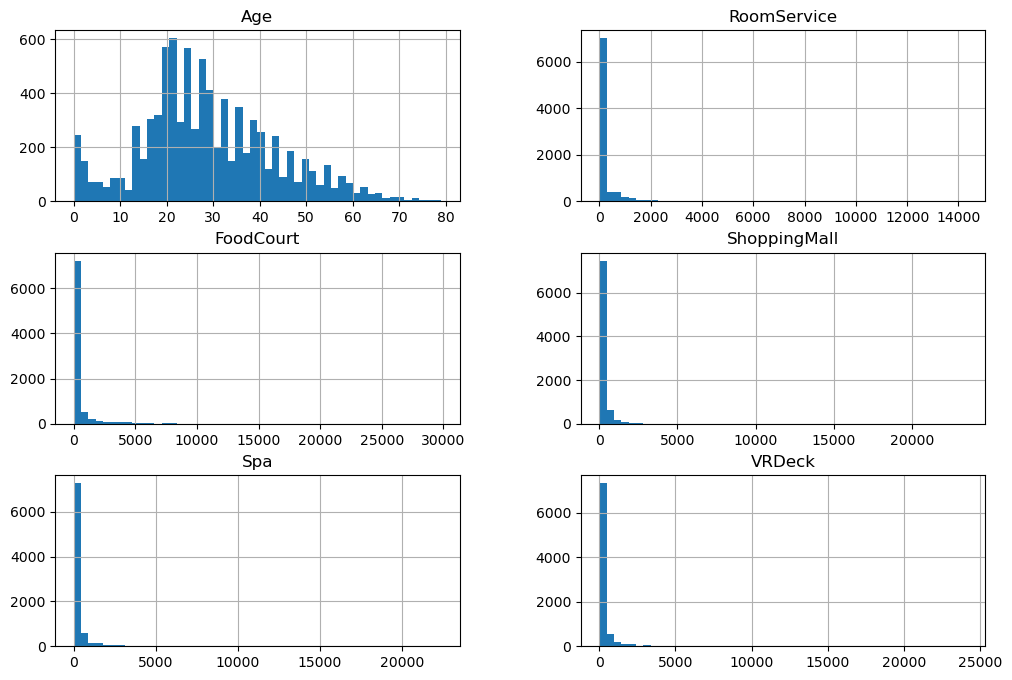

In [13]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

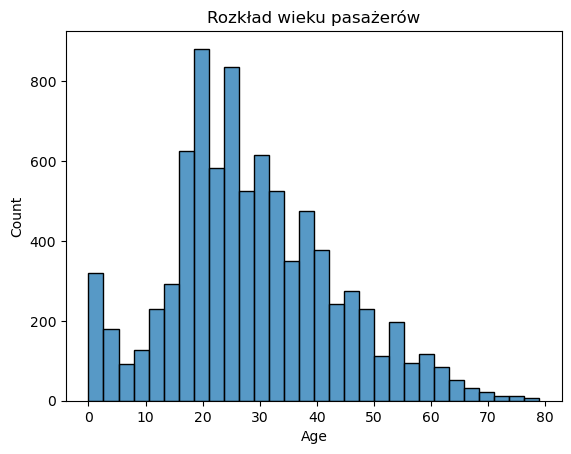

In [14]:
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

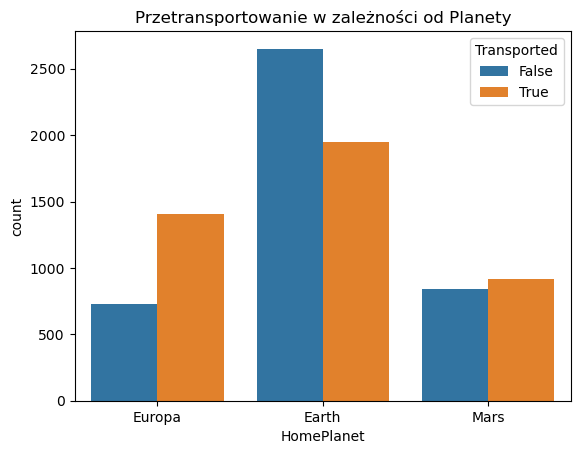

In [15]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

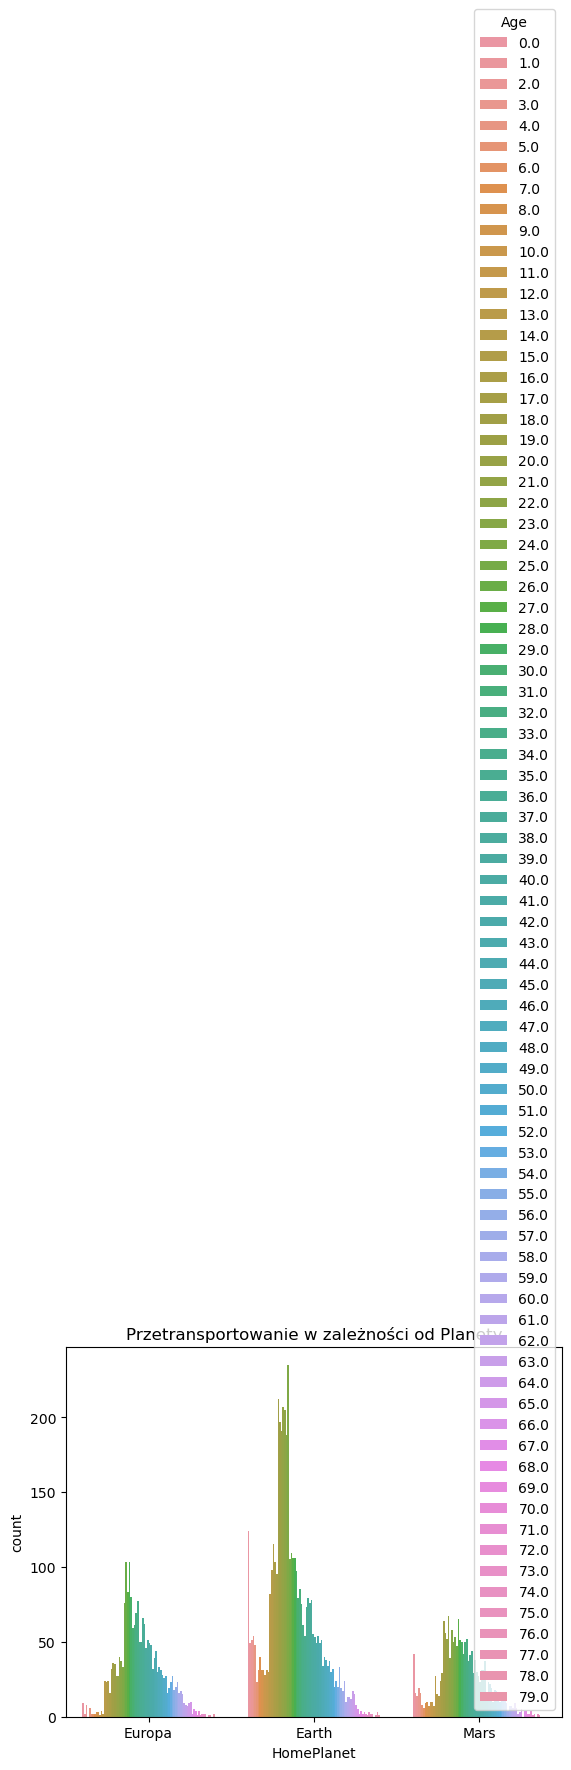

In [16]:
sns.countplot(x='HomePlanet', hue='Age', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

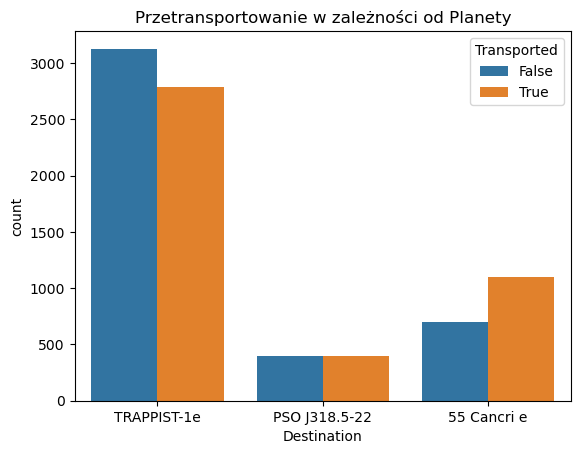

In [94]:
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

### Wnioski z Wizualizacji

### Zamiana danych kategorycznych na numeryczne i wypełnienie danych

Dane które bedzmiemy kowertowac musza byc zmienione dla dataset train i test

In [98]:
train.isnull().sum() , test.isnull().sum() 

(PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64,
 PassengerId       0
 HomePlanet       87
 CryoSleep        93
 Cabin           100
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

- HomePlanet      2019
Destination     1- 82
Age             179
VIP        policze srednia wydanych pieniedzy na statku da osób nie bedacych vipem, jezli jest powyzej to bedzie to vip -  203
Room Servicwypłn -   181
Fo odCourtwypełn -    183
 Shoppingwypełnl-     208
Spa    wypełnn -      1 83
VRDeckwypełn       188
Name usun rted       0

In [120]:
train['Cabin'].map(lambda x:train["Cabin"].split("/"))

AttributeError: 'Series' object has no attribute 'split'

In [22]:
# Wypełnianie brakujących wartości liczbą 0 w zmiennych związanych z usługami

column_0 = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in column_0:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    

In [54]:
# Wypełnianie brakujących wartości dla zmiennych kategorycznych
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('Unknown')
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])

test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])

# Wypełnianie brakujących wartości dla zmiennej 'Age'
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [56]:
def sleep(row):
    if row['RoomService'] > 0 : return False
    if row['FoodCourt'] > 0 : return False
    if row['ShoppingMall'] > 0 : return False
    if row['Spa'] > 0 : return False
    if row['VRDeck'] > 0 : return False
    return True

train.loc[train['CryoSleep'].isnull(),'CryoSleep'] = train.apply(sleep, axis = 1)
test.loc[test['CryoSleep'].isnull(),'CryoSleep'] = test.apply(sleep, axis = 1)


### Zamiana wartosci kategorycznych na wartosci numeryczne 

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

categorial_col = ['HomePlanet', 'Destination','CryoSleep','VIP']

train['Transported'] = le.fit_transform(train['Transported'])

for col in categorial_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    



### Model bazowy

In [61]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score

X  = train.drop(['Cabin','Name','Transported'], axis = 1)
y = train['Transported']

cross_val_score(DummyClassifier(strategy='stratified', random_state=42),X,y, cv = 5).mean()

0.49453589916827195

In [62]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.6909153111684757

In [65]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.7411747423059031

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state = 42)

accuracies = []
                      
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val,y_pred)
    accuracies.append(accuracy)
    
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')


Średnia dokładność: 0.7951


In [71]:
train['GroupID']= train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
test['GroupID']= test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)


In [73]:
train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')


In [75]:
train['is_alone'] = train['GroupID'].map(lambda x: 1 if x == 1 else 0)
test['is_alone'] = test['GroupID'].map(lambda x: 1 if x == 1 else 0)


In [77]:
X = train.drop(columns=['Transported', 'PassengerId', 'Name', 'Cabin', 'GroupID'])  # Usuwamy zbędne kolumny
y = train['Transported']  # Etykieta do przewidywania

# Przechowujemy wyniki dokładności z każdej iteracji
accuracies = []

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tworzymy model (Random Forest w tym przypadku)
    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    
    # Trenowanie modelu
    model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')

Średnia dokładność: 0.7898
